In [1]:
import urllib.request
urllib.request.urlretrieve ("http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz", "kddcup10.data.gz")
urllib.request.urlretrieve("http://kdd.ics.uci.edu/databases/kddcup99/corrected.gz", "corrected.gz")
urllib.request.urlretrieve('http://cs.joensuu.fi/sipu/datasets/unbalance.txt', 'unbalance.txt')

('unbalance.txt', <http.client.HTTPMessage at 0x7f55b81862b0>)

In [2]:
from pyspark import SparkContext
sc = SparkContext()

### NumPy (Numerical Python) - Basics

In [4]:
import numpy
from numpy import array

In [5]:
list_of_list = [[1,2], [4,9], [10,100]]  # list of list
# list_of_list + 1
# list_of_list * 2

# A numpy array is similar to MATLAB matrix
numpy_array = array(list_of_list)
print(numpy_array)
print('Add 1 to each element')
print(numpy_array + 1)
print('-------')
print('Multiply each element by 2')
print(numpy_array * 2)

[[  1   2]
 [  4   9]
 [ 10 100]]
Add 1 to each element
[[  2   3]
 [  5  10]
 [ 11 101]]
-------
Multiply each element by 2
[[  2   4]
 [  8  18]
 [ 20 200]]


In [6]:
print('Shape of array is ', numpy_array.shape)
print('Rank of array (matrix) is ', numpy_array.ndim)
print('Item size is ', numpy_array.dtype)
print('Reshaped Array from 3x2 into 2x3:')
print(numpy_array.reshape(2,3))

Shape of array is  (3, 2)
Rank of array (matrix) is  2
Item size is  int64
Reshaped Array from 3x2 into 2x3:
[[  1   2   4]
 [  9  10 100]]


#### numpy array operations

In [7]:
A = array( [[1,1],
               [0,1]] )
B = array( [[2,0],
                   [3,4]] )

print('A')
print(A)
print('B')
print(B)
print('\n')
print('A*B')
print(A*B)
print('\n')
print('A-B')
print(A-B)
print('\n')
print('A.B')
print(A.dot(B))

A
[[1 1]
 [0 1]]
B
[[2 0]
 [3 4]]


A*B
[[2 0]
 [0 4]]


A-B
[[-1  1]
 [-3 -3]]


A.B
[[5 4]
 [3 4]]


In [8]:
# Some more statistical functions
print('Sum of matrix A is ', A.sum())
print('Sum of matrix B is ', B.sum())
print('Min element in marix B is ', B.min())
print('Max element in marix B is ', B.max())
print('Exponential for B is ', numpy.exp(B))
print('Exponential for B is ', numpy.sqrt(B))

Sum of matrix A is  3
Sum of matrix B is  9
Min element in marix B is  0
Max element in marix B is  4
Exponential for B is  [[  7.3890561    1.        ]
 [ 20.08553692  54.59815003]]
Exponential for B is  [[ 1.41421356  0.        ]
 [ 1.73205081  2.        ]]


## 1. Logistic Regression

#### Load the training and test data set in raw form

In [9]:
raw_data = sc.textFile('kddcup10.data.gz')
test_raw_data = sc.textFile('corrected.gz')

In [11]:
raw_data.take(10)  # Check how the data looks like

['0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,9,9,1.00,0.00,0.11,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,19,19,1.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,29,29,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,39,39,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,49,49,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,59,59,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,212,1940,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0.00,0.00,0.00,0.00,1.00,0.00,

In [12]:
raw_data.filter(lambda x: 'normal' not in x).take(10)  # Check how the 'not' normal data looks like

['184,tcp,telnet,SF,1511,2957,0,0,0,3,0,1,2,1,0,0,1,0,0,0,0,0,1,1,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1,3,1.00,0.00,1.00,0.67,0.00,0.00,0.00,0.00,buffer_overflow.',
 '305,tcp,telnet,SF,1735,2766,0,0,0,3,0,1,2,1,0,0,1,0,0,0,0,0,1,1,0.00,0.00,0.00,0.00,1.00,0.00,0.00,2,4,1.00,0.00,0.50,0.50,0.00,0.00,0.00,0.00,buffer_overflow.',
 '79,tcp,telnet,SF,281,1301,0,0,0,2,0,1,1,1,0,0,4,2,0,0,0,0,1,1,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1,10,1.00,0.00,1.00,0.30,0.00,0.00,0.00,0.10,loadmodule.',
 '25,tcp,telnet,SF,269,2333,0,0,0,0,0,1,0,1,0,2,2,1,0,0,0,0,1,1,0.00,0.00,0.00,0.00,1.00,0.00,0.00,69,2,0.03,0.06,0.01,0.00,0.00,0.00,0.00,0.00,perl.',
 '0,tcp,telnet,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,5,0.83,1.00,0.00,0.00,0.83,0.33,0.00,5,6,1.00,0.00,0.20,0.33,1.00,0.83,0.00,0.00,neptune.',
 '0,tcp,telnet,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,15,0.94,1.00,0.00,0.00,0.94,0.12,0.00,15,16,1.00,0.00,0.07,0.12,1.00,0.94,0.00,0.00,neptune.',
 '0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,316,3

In [13]:
test_raw_data.take(5)

['0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.00,0.00,0.00,0.00,1.00,0.00,0.00,255,254,1.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.00,0.00,0.00,0.00,1.00,0.00,0.00,255,254,1.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.00,0.00,0.00,0.00,1.00,0.00,0.00,255,254,1.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.00,0.00,0.00,0.00,1.00,0.00,0.00,255,254,1.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,snmpgetattack.',
 '0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.00,0.00,0.00,0.00,1.00,0.00,0.00,255,254,1.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,snmpgetattack.']

#### Prepare the raw training and test data for usage with the classifier

In [27]:
from pyspark.mllib.regression import LabeledPoint

# Write down the code for parsing here, "ONLY" the numerical columns have to be selected for training purposes!
def parse_interaction(line):
    """ Selects the numerical columns and converts the last column (attack type) to either 0.0 or 1.0 (output label)
    If the attack type is normal. then label should be 0.0 for every other case it should be 1.0
    
    Args: line of the data set in a string format
    
    Returns: LabeledPoint object where the first argument is the output label (Double) and 
    second argument is an numpy array of remaining feature columns (Double)
    """
    
    line_split = line.split(",")
    
    clean_line_split = line_split[0:1] + line_split[4:41]
    
    output_attack = 1.0
    # ei tarvitse loopata rivien läpi, koska map tekee sen puolestamme
    if line_split[41] == "normal.":
        output_attack = 0.0
    
    #funktio sovelletaan x:lle in jossakin
    #muutetaan lista numpy arrayksi, koska muuten ei voida soveltaa ml-tekniikoita
    features_numpy_array = array([float(x) for x in clean_line_split])
    return LabeledPoint(output_attack, features_numpy_array)

training_data = raw_data.map(parse_interaction)
test_data = test_raw_data.map(parse_interaction)

#### Train the Logistic Regression classfier with the training dataset

In [28]:
from pyspark.mllib.classification import LogisticRegressionWithLBFGS
logit_model = LogisticRegressionWithLBFGS.train(training_data)
logit_model

(weights=[-0.000146282991664,5.58882372126e-08,5.13510939473e-07,1.16235307129,1.58419308585,1.00416918531,0.607779510614,1.5367986336,-0.893095244835,0.0690004970982,2.27296846879,-4.1763045183,-0.0429633451348,-0.053632875555,-0.211254330573,-0.961017981702,0.0,0.0,-8.28199311599,0.00626242948255,0.00386865260311,0.765770616254,0.763982274633,0.108897281546,0.532150423848,-2.21633654068,-1.30946760048,-0.401016020748,0.00571152414706,-0.00319413266449,-0.457927064132,-2.42979425203,1.62117921241,3.60061991692,0.77738551778,0.771790090901,0.174119422595,0.436694921954], intercept=0.0)

#### Predict the output labels for test datasets with the logistic regression classifier model object

In [29]:
# logit_model.predict will predict the output label based on the features given to it
original_labels_vs_predicted_labels = test_data.map(lambda p: (p.label, logit_model.predict(p.features)))
original_labels_vs_predicted_labels.take(5)

[(0.0, 0), (0.0, 0), (0.0, 0), (1.0, 0), (1.0, 0)]

#### Test the accuracy by selecting only the records where the given labels and predicted labels are equal , and dividing the count of those records by total records

In [30]:
test_accuracy = original_labels_vs_predicted_labels.filter(lambda x: x[0] == x[1]).count() / float(test_data.count())
print(round(test_accuracy,4))  # Print the accuracy

0.9173


## 2. k-means Clustering

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from pyspark.mllib.clustering import KMeans, KMeansModel
from math import sqrt

In [11]:
rdd = sc.textFile('unbalance.txt')
rdd.take(5)

['151700 351102',
 '155799 354358',
 '142857 352716',
 '152726 349144',
 '151008 349692']

In [12]:
rdd_split = rdd.map(lambda line: line.split(' '))
rdd_split.take(5)

[['151700', '351102'],
 ['155799', '354358'],
 ['142857', '352716'],
 ['152726', '349144'],
 ['151008', '349692']]

In [18]:
features = rdd_split.map(lambda x: (float(x[0]), float(x[1]))).cache()  # Select only the features , convert to float
#output = rdd_split.map(lambda x: int(x[2])).cache()  # Take the output
#print(features)
print(features.take(2))
#print(output.take(2))

[(151700.0, 351102.0), (155799.0, 354358.0)]


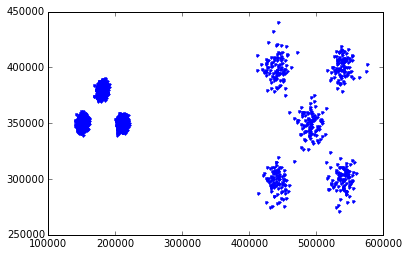

In [19]:
#from RDD to list to array

features_python_list = features.collect()
# Convert it to a numpy array
features_numpy_array = array(features_python_list)
# Plot the figure using matplotlib library
plt.plot(features_numpy_array[:,0], features_numpy_array[:,1], 'b.')
plt.show()

In [26]:
# Build the model (cluster the data)
cluster_model = KMeans.train(features, 8)  # intialization step is crucial in algorithms which are randomized
#cluster_model = KMeans.train(features, 8, initializationSteps=100, epsilon=1e-4)

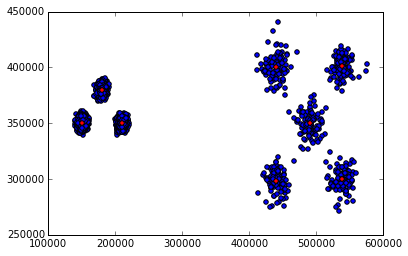

In [27]:
cluster_centers = array(cluster_model.clusterCenters)

plt.scatter(features_numpy_array[:,0], features_numpy_array[:,1]) # Plot the points first

for index in range(0,8):  # For every cluster plot the centers
    plt.scatter(cluster_centers[index,0], cluster_centers[index,1], c='r')
plt.show()

In [30]:
# predict the output labels using the model generated
# features -> input
# cluster model

# 1) train 2) predict

predicted_labels = cluster_model.predict(features).collect()
#print(predicted_labels)  # have a look at the result

# take out the unique output labels from array (Hint: Use numpy unique function!)
unique_labels = numpy.unique(predicted_labels)
print(unique_labels)

[0 1 2 3 4 5 6 7]


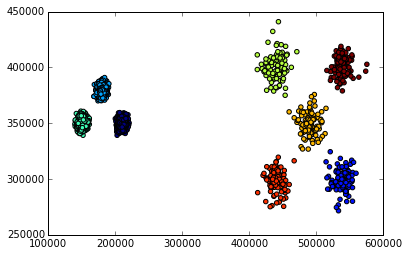

In [31]:
# Now plot the scatter plot of the points again using the command above but with colors (Hint: use the parameter c to pass color array)
plt.scatter(features_numpy_array[:,0], features_numpy_array[:,1], c = predicted_labels)

In [ ]:
# Calculate the computational cost of the cluster